<a href="https://colab.research.google.com/github/Stecklert1/UST--Deep-Learning-2026/blob/main/Deep_Learning_Week_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

In [4]:
# Load MNIST
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Normalize images
x_train = x_train.astype("float32") / 255.0
x_test  = x_test.astype("float32") / 255.0

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [5]:
# Convert labels to binary:
#    1 = digit is 3
#    0 = digit is NOT 3
y_train = (y_train == 3).astype("float32")
y_test  = (y_test == 3).astype("float32")

print("Train label distribution:", np.bincount(y_train.astype(int)))
print("Test label distribution:", np.bincount(y_test.astype(int)))

Train label distribution: [53869  6131]
Test label distribution: [8990 1010]


In [6]:
model = keras.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(128, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(1, activation="sigmoid")  # Binary output
])

model.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [7]:
#Train
N = 3400 # number of training images to use

model.fit(
    x_train[:N],
    y_train[:N],
    epochs=10,
    batch_size=64,
    validation_split=0.2
)



test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")

Epoch 1/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.8689 - loss: 0.3251 - val_accuracy: 0.9721 - val_loss: 0.1136
Epoch 2/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9614 - loss: 0.1146 - val_accuracy: 0.9691 - val_loss: 0.1049
Epoch 3/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9822 - loss: 0.0611 - val_accuracy: 0.9721 - val_loss: 0.0805
Epoch 4/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9867 - loss: 0.0459 - val_accuracy: 0.9618 - val_loss: 0.0947
Epoch 5/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9892 - loss: 0.0356 - val_accuracy: 0.9691 - val_loss: 0.0755
Epoch 6/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9938 - loss: 0.0225 - val_accuracy: 0.9691 - val_loss: 0.0747
Epoch 7/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9986 - loss: 0.0124 - val_accuracy: 0.9765 - val_loss: 0.0708
Epoch 8/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9998 - loss: 0.0086 - val_accuracy: 0.9750 - val_l

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
Prediction probability (is 3): 0.0006
Predicted label: not 3
True label: not 3


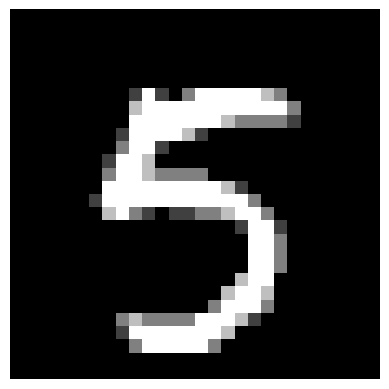

Prediction probability (is 3): 0.0000
Predicted label: not 3
True label: not 3


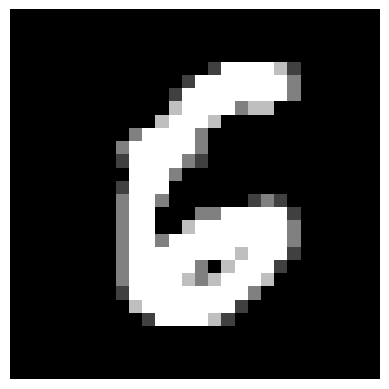

Prediction probability (is 3): 0.0000
Predicted label: not 3
True label: not 3


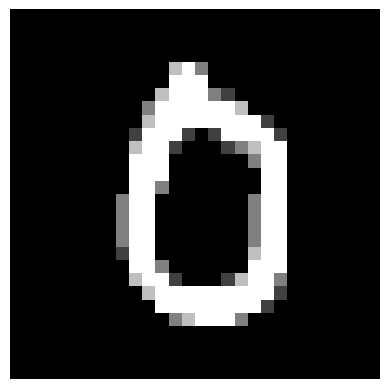

Prediction probability (is 3): 0.0001
Predicted label: not 3
True label: not 3


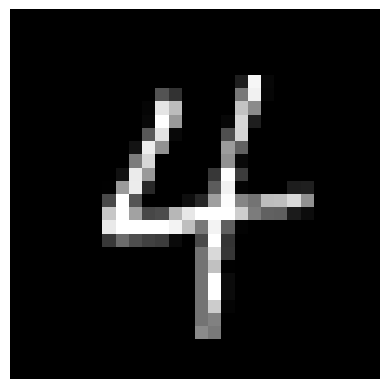

Prediction probability (is 3): 1.0000
Predicted label: 3
True label: 3


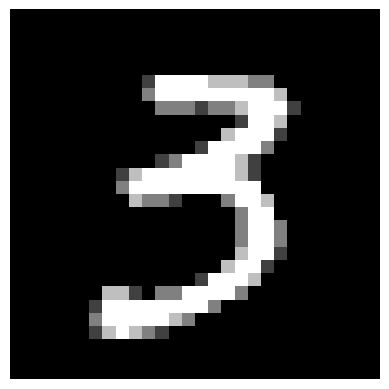

In [ ]:
num_samples = 5
indices = np.random.randint(0, len(x_test), size=num_samples)

preds = model.predict(x_test[indices])

for i, idx in enumerate(indices):
    plt.imshow(x_test[idx], cmap="gray")
    plt.axis("off")

    prob = preds[i][0]
    pred_label = 1 if prob >= 0.5 else 0
    true_label = y_test[idx]

    print(f"Prediction probability (is 3): {prob:.4f}")
    print(f"Predicted label: {'3' if pred_label == 1 else 'not 3'}")
    print(f"True label: {'3' if true_label == 1 else 'not 3'}")
    plt.show()

Week 3 Assignment - Graphs

In [8]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

def build_model():
    model = keras.Sequential([
        layers.Flatten(input_shape=(28, 28)),
        layers.Dense(128, activation="relu"),
        layers.Dense(64, activation="relu"),
        layers.Dense(1, activation="sigmoid")
    ])
    model.compile(
        optimizer="adam",
        loss="binary_crossentropy",
        metrics=["accuracy"]
    )
    return model

train_sizes = [1000, 3000, 3100, 3250, 3500, 3600, 3750, 4000]
results = []

for N in train_sizes:
    print(f"\nTraining with {N} samples")

    # Shuffle before slicing
    perm = np.random.permutation(len(x_train))
    x_subset = x_train[perm][:N]
    y_subset = y_train[perm][:N]

    model = build_model()
    model.fit(
        x_subset,
        y_subset,
        epochs=10,
        batch_size=64,
        verbose=0
    )

    loss, acc = model.evaluate(x_test, y_test, verbose=0)
    results.append((N, acc))
    print(f"Test accuracy: {acc:.4f}")


Training with 1000 samples
Test accuracy: 0.9734

Training with 3000 samples
Test accuracy: 0.9839

Training with 3100 samples
Test accuracy: 0.9842

Training with 3250 samples
Test accuracy: 0.9823

Training with 3500 samples
Test accuracy: 0.9839

Training with 3600 samples
Test accuracy: 0.9869

Training with 3750 samples
Test accuracy: 0.9866

Training with 4000 samples
Test accuracy: 0.9880


In [ ]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(train_sizes, results, marker='o')
plt.xscale('linear')
plt.xlabel("Number of training samples")
plt.ylabel("Test accuracy")
plt.title("Learning Curve: MNIST (3 vs Not 3)")
plt.grid(True)
plt.show()

In [ ]:
def build_cnn():
    model = keras.Sequential([
        layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
        layers.MaxPooling2D((2,2)),
        layers.Conv2D(64, (3,3), activation='relu'),
        layers.MaxPooling2D((2,2)),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(1, activation='sigmoid')  # Binary output
    ])

    model.compile(
        optimizer='adam',
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    return model


In [ ]:
perm = np.random.permutation(len(x_train))
x_train_shuffled = x_train[perm]
y_train_shuffled = y_train[perm]

In [ ]:
train_sizes = [100, 300, 1000, 3000, 10000]
test_accuracies = []

# Train models with increasing dataset size
for N in train_sizes:
    print(f"Training with {N} samples")
    model = build_cnn()
    model.fit(
        x_train[:N],
        y_train[:N],
        epochs=5,
        batch_size=64,
        verbose=0
    )
    loss, acc = model.evaluate(x_test, y_test, verbose=0)
    test_accuracies.append(acc)
    print(f"Test accuracy: {acc:.4f}")

Training with 100 samples


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Test accuracy: 0.8990
Training with 300 samples
Test accuracy: 0.8990
Training with 1000 samples
Test accuracy: 0.8990
Training with 3000 samples
Test accuracy: 0.9748
Training with 10000 samples
Test accuracy: 0.9928


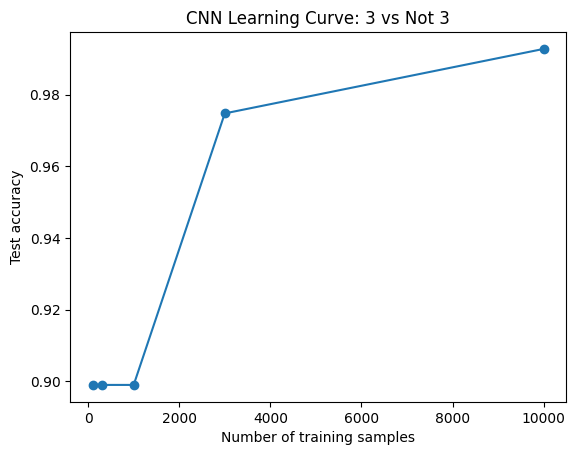

In [ ]:
plt.figure()
plt.plot(train_sizes, test_accuracies, marker='o')
plt.xscale('linear')
plt.xlabel("Number of training samples")
plt.ylabel("Test accuracy")
plt.title("CNN Learning Curve: 3 vs Not 3")
plt.show()

In [ ]:
x_train_cnn = x_train[..., np.newaxis]
x_test_cnn  = x_test[..., np.newaxis]

In [ ]:
train_sizes = [100, 300, 1000, 3000, 10000]

dense_accuracies = []
cnn_accuracies = []

for N in train_sizes:
    print(f"\nTraining with {N} samples")

    # ----- Dense NN -----
    dense_model = build_model()
    dense_model.fit(
        x_train[:N].reshape(N, 28, 28),  # no channel dimension
        y_train[:N],
        epochs=5,
        batch_size=64,
        verbose=0
    )
    _, dense_acc = dense_model.evaluate(x_test.reshape(-1,28,28), y_test, verbose=0)
    dense_accuracies.append(dense_acc)

    # ----- CNN -----
    cnn_model = build_cnn()
    cnn_model.fit(
        x_train_cnn[:N],   # with channel dimension
        y_train[:N],
        epochs=5,
        batch_size=64,
        verbose=0
    )
    _, cnn_acc = cnn_model.evaluate(x_test_cnn, y_test, verbose=0)
    cnn_accuracies.append(cnn_acc)

    print(f"Dense acc: {dense_acc:.4f} | CNN acc: {cnn_acc:.4f}")


Training with 100 samples
Dense acc: 0.8994 | CNN acc: 0.8990

Training with 300 samples
Dense acc: 0.9334 | CNN acc: 0.8990

Training with 1000 samples
Dense acc: 0.9660 | CNN acc: 0.9387

Training with 3000 samples
Dense acc: 0.9809 | CNN acc: 0.9898

Training with 10000 samples
Dense acc: 0.9896 | CNN acc: 0.9966


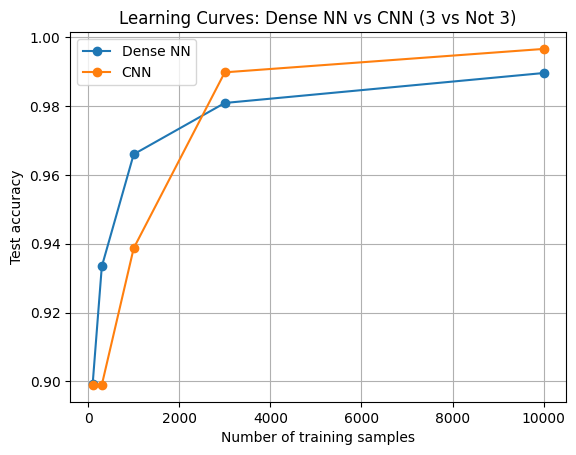

In [ ]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(train_sizes, dense_accuracies, marker="o", label="Dense NN")
plt.plot(train_sizes, cnn_accuracies, marker="o", label="CNN")

plt.xscale("linear")
plt.xlabel("Number of training samples")
plt.ylabel("Test accuracy")
plt.title("Learning Curves: Dense NN vs CNN (3 vs Not 3)")
plt.legend()
plt.grid(True)
plt.show()